# Deep Neural Networks

# Nodirbek Parpibaev / 20162030
In this chapter we learned about deep learning, backward propagation and how to train the neural networks in
keras python library, more precisely the keras API of tensorflow. We also learned visualization technniques
like tensorboard and how to tune hyperparameters at the end.
# I did exercise 10

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred =  per_clf.predict([[2, 0.5]])

In [3]:
print(y_pred)

[0]


In [4]:
print(IMAGES_PATH)

./images/ann


In [5]:
print(type(IMAGES_PATH))

<class 'str'>


In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

Saving figure perceptron_iris_plot


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

In [8]:
def f(x):
    return 10*x*x + 5
derivative(f, 12)

239.9999998488056

In [9]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

Saving figure activation_functions_plot


In [10]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

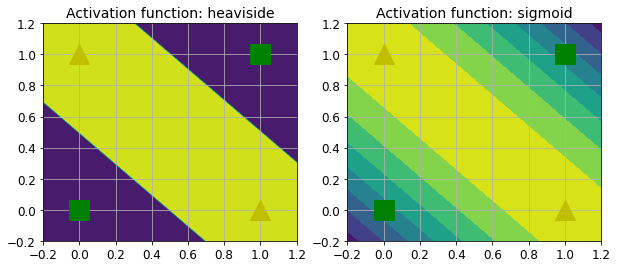

In [11]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

In [12]:
import tensorflow as tf
from tensorflow import keras


In [13]:
tf.__version__

'2.3.1'

In [14]:
keras.__version__

'2.4.0'

# Building image classifier using the sequential API

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [17]:
print(type(fashion_mnist))

<class 'module'>


In [18]:
print(fashion_mnist)

<module 'tensorflow.keras.datasets.fashion_mnist' from '/home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>


In [19]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [20]:
print(X_train_full)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [21]:
print(X_train_full.shape)

(60000, 28, 28)


In [22]:
X_train_full.dtype

dtype('uint8')

In [23]:
print(type(X_train_full))

<class 'numpy.ndarray'>


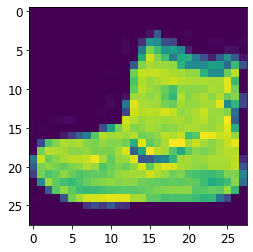

In [24]:
plt.imshow(X_train_full[0])

In [25]:
X_valid,X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [26]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [27]:
class_names[y_train[0]]

'Coat'

In [28]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [29]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[28,28]),
                                keras.layers.Dense(300, activation="relu"),
                                keras.layers.Dense(100, activation="relu"),
                                keras.layers.Dense(10, activation="softmax")])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.layers


In [32]:
hidden1 = model.layers[1]

In [33]:
hidden1

In [34]:
hidden1.name

'dense_3'

In [51]:
weights, biases =  hidden1.get_weights()

In [52]:
weights

array([[ 0.01959171,  0.00872301, -0.03112234, ...,  0.06354313,
         0.07036145,  0.05550694],
       [-0.01654816,  0.03802552, -0.02629899, ...,  0.04476937,
         0.01996943, -0.05336453],
       [-0.05201257,  0.02147534, -0.01432136, ...,  0.03577851,
         0.03249243, -0.03864357],
       ...,
       [ 0.00054044,  0.05833007, -0.04882852, ..., -0.06790175,
         0.03085179,  0.05687365],
       [ 0.03099652, -0.06171024,  0.06964928, ...,  0.02115636,
        -0.00117611, -0.0062284 ],
       [ 0.06323737,  0.06267114, -0.01427964, ...,  0.01371022,
         0.03284611, -0.00308293]], dtype=float32)

In [53]:
print(weights)

[[ 0.01959171  0.00872301 -0.03112234 ...  0.06354313  0.07036145
   0.05550694]
 [-0.01654816  0.03802552 -0.02629899 ...  0.04476937  0.01996943
  -0.05336453]
 [-0.05201257  0.02147534 -0.01432136 ...  0.03577851  0.03249243
  -0.03864357]
 ...
 [ 0.00054044  0.05833007 -0.04882852 ... -0.06790175  0.03085179
   0.05687365]
 [ 0.03099652 -0.06171024  0.06964928 ...  0.02115636 -0.00117611
  -0.0062284 ]
 [ 0.06323737  0.06267114 -0.01427964 ...  0.01371022  0.03284611
  -0.00308293]]


In [54]:
weights.shape

(784, 300)

In [55]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [56]:
biases.shape

(300,)

In [57]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [61]:
history

import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    i

In [63]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])



In [64]:
model.summary

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f58902d6250>>

In [65]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_19 (Dense)             (None, 300)               30300     
_________________________________________________________________
dense_20 (Dense)             (None, 10)                3010      
Total params: 111,810
Trainable params: 111,810
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.layers

In [67]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])


In [68]:
history = model.fit(X_train, y_train, epochs = 50, validation_data=(X_valid, y_valid))

Epoch 1/50
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7797 - accuracy: 0.7411 - val_loss: 0.5171 - val_accuracy: 0.8274
Epoch 2/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.5061 - accuracy: 0.8236 - val_loss: 0.4505 - val_accuracy: 0.8460
Epoch 3/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4585 - accuracy: 0.8380 - val_loss: 0.4623 - val_accuracy: 0.8360
Epoch 4/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4307 - accuracy: 0.8478 - val_loss: 0.4020 - val_accuracy: 0.8594
Epoch 5/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4088 - accuracy: 0.8563 - val_loss: 0.3986 - val_accuracy: 0.8592
Epoch 6/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3924 - accuracy: 0.8613 - val_loss: 0.3762 - val_accuracy: 0.8682
Epoch 7/50
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3798 - accuracy: 0.8662 - val_loss: 0.3702 - val_accuracy:

In [69]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 1719}

In [70]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

In [71]:
history.history

{'loss': [0.7796783447265625,
  0.5060768127441406,
  0.45852887630462646,
  0.43071502447128296,
  0.4087633192539215,
  0.39240628480911255,
  0.3797970116138458,
  0.36866363883018494,
  0.3581683933734894,
  0.3497699797153473,
  0.3417350947856903,
  0.3344765305519104,
  0.3276815116405487,
  0.3207181692123413,
  0.314516544342041,
  0.3100103735923767,
  0.3044995963573456,
  0.3005620241165161,
  0.29479873180389404,
  0.2906290590763092,
  0.2857615649700165,
  0.2815207839012146,
  0.27785739302635193,
  0.27377110719680786,
  0.2702332139015198,
  0.26627257466316223,
  0.26319724321365356,
  0.2589838206768036,
  0.2553654611110687,
  0.2523048222064972,
  0.24959352612495422,
  0.24692852795124054,
  0.2427036464214325,
  0.2395506501197815,
  0.23791532218456268,
  0.2342788130044937,
  0.23173832893371582,
  0.22847281396389008,
  0.22628208994865417,
  0.22357988357543945,
  0.2202696055173874,
  0.21799764037132263,
  0.21609298884868622,
  0.21300706267356873,
  0.21

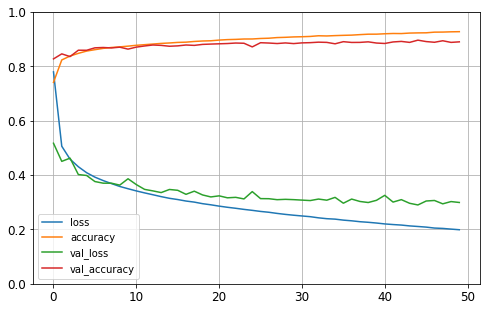

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [73]:
history2 = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1965 - accuracy: 0.9290 - val_loss: 0.2969 - val_accuracy: 0.8918
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1953 - accuracy: 0.9301 - val_loss: 0.3255 - val_accuracy: 0.8856
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1919 - accuracy: 0.9311 - val_loss: 0.3051 - val_accuracy: 0.8870
Epoch 4/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1902 - accuracy: 0.9321 - val_loss: 0.3017 - val_accuracy: 0.8914
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1885 - accuracy: 0.9315 - val_loss: 0.3037 - val_accuracy: 0.8886
Epoch 6/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1852 - accuracy: 0.9320 - val_loss: 0.3023 - val_accuracy: 0.8894
Epoch 7/20
1719/1719 [==============================] - 4s 3ms/step - loss: 0.1839 - accuracy: 0.9339 - val_loss: 0.3190 - val_accuracy:

In [74]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 76.0098 - accuracy: 0.8379


[76.00980377197266, 0.8378999829292297]

In [75]:
X_new = X_test[:3]
y_proba = model.predict(X_new)

In [76]:
y_proba.round(4)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [77]:
y_pred = model.predict_classes(X_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [78]:
y_pred

array([9, 2, 1])

In [79]:
y_new = y_test[:3]

In [80]:
y_new


array([9, 2, 1], dtype=uint8)

# Building a regression model with MLP

In [81]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
housing  = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [83]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1527 - val_loss: 1.0639
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8956 - val_loss: 0.7916
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7568 - val_loss: 0.7246
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6990 - val_loss: 0.6807
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6587 - val_loss: 0.6495
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6274 - val_loss: 0.6233
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6029 - val_loss: 0.6028
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5831 - val_loss: 0.5857
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5665 - val_loss: 0.5734
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5530 - val_loss: 0.5606

In [84]:
y_pred

array([[0.552825 ],
       [1.482809 ],
       [3.0731254]], dtype=float32)

In [85]:
mse_test

0.4849393665790558

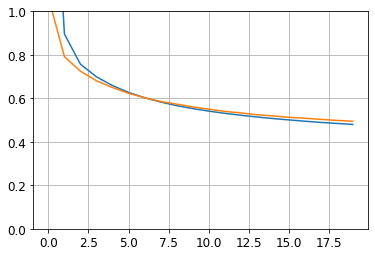

In [86]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

# Using functional API

In [87]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])


In [88]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
model.fit(X_train, y_train, epochs = 20, validation_data=[X_valid, y_valid], )

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.0114 - val_loss: 0.0000e+00
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7995 - val_loss: 0.0000e+00
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6852 - val_loss: 0.0000e+00
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6264 - val_loss: 0.0000e+00
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5874 - val_loss: 0.0000e+00
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5605 - val_loss: 0.0000e+00
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5387 - val_loss: 0.0000e+00
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5226 - val_loss: 0.0000e+00
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5092 - val_loss: 0.0000e+00
Epoch 10/20
363/363 [==============================] - 0s 1ms/st

In [89]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4583


0.458286315202713

In [90]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])


In [91]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.4674 - val_loss: 1.1162
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.9416 - val_loss: 0.8184
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7742 - val_loss: 0.7302
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7044 - val_loss: 0.6814
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6604 - val_loss: 0.6464
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6263 - val_loss: 0.6185
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5959 - val_loss: 0.5917
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5696 - val_loss: 0.5709
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5488 - val_loss: 0.5565
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5337 - val_loss: 0.5451

In [92]:
print(mse_test)
print(y_pred)

0.4853005111217499
[[0.54907477]
 [1.8290493 ]
 [2.928341  ]]


In [93]:
print(y_test[:3])

[0.477   0.458   5.00001]


In [94]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [95]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")

In [96]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs= 20, validation_data =([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9433 - main_output_loss: 0.8300 - aux_output_loss: 1.9627 - val_loss: 0.6085 - val_main_output_loss: 0.5356 - val_aux_output_loss: 1.2644
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5647 - main_output_loss: 0.5023 - aux_output_loss: 1.1264 - val_loss: 0.5636 - val_main_output_loss: 0.5085 - val_aux_output_loss: 1.0602
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5256 - main_output_loss: 0.4783 - aux_output_loss: 0.9507 - val_loss: 0.5293 - val_main_output_loss: 0.4865 - val_aux_output_loss: 0.9151
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4994 - main_output_loss: 0.4601 - aux_output_loss: 0.8525 - val_loss: 0.5053 - val_main_output_loss: 0.4692 - val_aux_output_loss: 0.8304
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4835 - main_output_loss: 0.4516 - aux_output_loss: 0.7704 - val_loss

In [97]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.3876 - main_output_loss: 0.3722 - aux_output_loss: 0.5256


In [98]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

In [99]:
y_pred_main

array([[0.5275719],
       [1.7130573],
       [3.331562 ]], dtype=float32)

In [100]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [101]:
y_pred_aux

array([[0.83782995],
       [1.9703066 ],
       [2.6840138 ]], dtype=float32)

In [102]:
class WideAndDeep(keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B, inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeep()

In [104]:
model = keras.models.load_model("my_keras_model.h5")

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = "relu", input_shape=[8]),
    keras.layers.Dense(30, activation = "relu"),
    keras.layers.Dense(1)
])


In [106]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.7694 - val_loss: 0.9484
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7700 - val_loss: 0.7104
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6741 - val_loss: 0.6560
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6349 - val_loss: 0.6280
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.6072 - val_loss: 0.6069
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5849 - val_loss: 0.5886
Epoch 7/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5652 - val_loss: 0.5699
Epoch 8/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5476 - val_loss: 0.5540
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.5321 - val_loss: 0.5406
Epoch 10/10
162/162 [==============================] - 0s 954us/step - loss: 0.5090


# Using TensorBoard

In [108]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()

In [109]:
run_logdir

'./my_logs/run_2020_11_16-01_26_29'

In [110]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 0.2058WARNING:tensorflow:From /home/nbp/python/my_env/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 2ms/step - loss: 0.5062 - val_loss: 0.5175
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4954 - val_loss: 0.5073
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4860 - val_loss: 0.4987
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4778 - val_loss: 0.4907
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4840
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4639 - val_loss: 0.4784
Epoch 7/30
363/363 [========================

In [111]:
%load_ext tensorboard

In [112]:
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 7272), started 0:01:39 ago. (Use '!kill 7272' to kill it.)

In [113]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_11_16-01_37_14'

In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [116]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7432 - val_loss: 2.0988
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: nan - val_loss: nan
Epoch 11/30
363/363 [==============================] 

# Fine-Tuning the hyperparameters

In [117]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [119]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [120]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks = [keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.1344 - val_loss: 0.7348
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6084
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5705 - val_loss: 0.5676
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5358 - val_loss: 0.5435
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5117 - val_loss: 0.5211
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4944 - val_loss: 0.5083
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4811 - val_loss: 0.4959
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4705 - val_loss: 0.4876
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4625 - val_loss: 0.4810
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4568 - val_lo

363/363 [==============================] - 1s 2ms/step - loss: 0.3541 - val_loss: 0.3946
Epoch 82/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3583 - val_loss: 0.3955
Epoch 83/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3532 - val_loss: 0.3942
Epoch 84/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3558 - val_loss: 0.3900
Epoch 85/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3511 - val_loss: 0.4026
Epoch 86/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3538 - val_loss: 0.3894
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3489 - val_loss: 0.3919
Epoch 88/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3497 - val_loss: 0.3887
Epoch 89/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3509 - val_loss: 0.3926
Epoch 90/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3521 - val_loss: 

In [121]:
print(X)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

# Exercise 10

In [122]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [123]:
X_train_full.shape

(60000, 28, 28)

In [124]:
X_train_full.dtype

dtype('uint8')

In [125]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


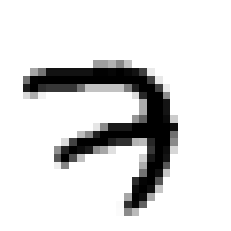

In [126]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [127]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

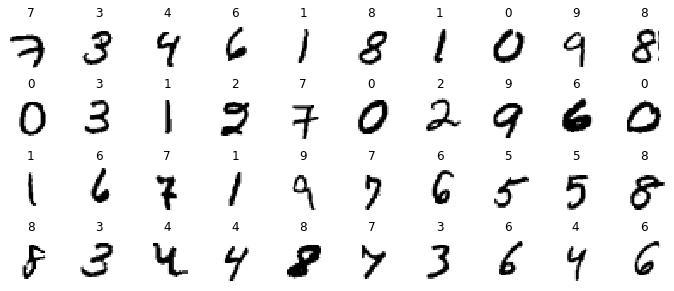

In [128]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()


In [129]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [130]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [131]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [132]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [133]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 9s 5ms/step - loss: 121113168.0000 - accuracy: 0.5734 - val_loss: 2.3911 - val_accuracy: 0.1126


In [134]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

In [135]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [137]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

In [138]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [139]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2377 - accuracy: 0.9270 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 2/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0941 - accuracy: 0.9710 - val_loss: 0.0868 - val_accuracy: 0.9754
Epoch 3/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0641 - accuracy: 0.9802 - val_loss: 0.0779 - val_accuracy: 0.9772
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9841 - val_loss: 0.0749 - val_accuracy: 0.9800
Epoch 5/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0345 - accuracy: 0.9886 - val_loss: 0.0732 - val_accuracy: 0.9814
Epoch 6/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0263 - accuracy: 0.9916 - val_loss: 0.0623 - val_accuracy: 0.9850
Epoch 7/100
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0203 - accuracy: 0.9934 - val_loss: 0.0842 - val_ac

In [142]:
model = keras.models.load_model("my_mnist_model.h5")
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.0982


[0.06463531404733658, 0.0982000008225441]

In [146]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model


In [152]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [153]:
keas_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test = keras_reg.score(X_test, y_test)
y_pred = keras_reg.predict(X_new)

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.3983 - val_loss: 3.8712
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5831 - val_loss: 0.6628
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4990 - val_loss: 0.4595
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4682 - val_loss: 0.4348
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4504 - val_loss: 0.4211
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4387 - val_loss: 0.4181
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4310 - val_loss: 0.4039
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4257 - val_loss: 0.4018
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4208 - val_loss: 0.3964
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4168 - val_lo

In [154]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [155]:
mse_test

-0.34998568892478943

In [156]:
y_pred

array([0.7159512, 1.6728512, 3.07078  ], dtype=float32)

In [158]:
param_distribs = { 
    "n_hidden" : [0,1,2,3],
    "n_neurons": np.arange(1,100),
    "learning_rate": reciprocal(3e-4,3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
242/242 [==============================] - 1s 2ms/step - loss: 3.3207 - val_loss: 1.4992
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0559 - val_loss: 0.7319
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6718 - val_loss: 0.6053
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5897 - val_loss: 0.5699
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5686 - val_loss: 0.5604
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5586 - val_loss: 0.7579
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5572 - val_loss: 0.7057
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5534 - val_loss: 0.7248
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5528 - val_loss: 0.5514
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5465 - val_lo

242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 21.0481
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 20.9471
Epoch 60/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 20.7678
Epoch 61/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4981 - val_loss: 20.8063
Epoch 62/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4981 - val_loss: 20.7808
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 20.7998
Epoch 64/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4982 - val_loss: 20.7792
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4981 - val_loss: 20.8775
Epoch 66/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4983 - val_loss: 20.9332
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4982 - v

Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 27.7075 - val_loss: 9369.8418
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 178.8079 - val_loss: 18480.2598
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 177.1217 - val_loss: 36080.4961
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 93.4513 - val_loss: 66583.2266
Epoch 11/100
121/121 [==============================] - 0s 1ms/step - loss: 142.3103
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 3.1813 - val_loss: 2.5589
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 1.1698 - val_loss: 1.0038
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7789 - val_loss: 0.7237
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6769 - val_loss: 0.6433
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6368 - v

Epoch 22/100
121/121 [==============================] - 0s 1ms/step - loss: 0.4862
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 2.6222 - val_loss: 1.1868
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.9524 - val_loss: 0.8091
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7543 - val_loss: 0.7103
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7017 - val_loss: 0.6742
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6710 - val_loss: 0.6561
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6466 - val_loss: 0.6157
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6248 - val_loss: 0.5975
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.6058 - val_loss: 0.6195
Epoch 9/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5610
Epoch 10

242/242 [==============================] - 1s 2ms/step - loss: 0.5345 - val_loss: 0.5090
Epoch 23/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5261 - val_loss: 0.5032
Epoch 24/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5176 - val_loss: 0.4943
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5097 - val_loss: 0.4884
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5017 - val_loss: 0.4816
Epoch 27/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4943 - val_loss: 0.4766
Epoch 28/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4868 - val_loss: 0.4714
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4800 - val_loss: 0.4673
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4735 - val_loss: 0.4616
Epoch 31/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4671 - val_loss: 

242/242 [==============================] - 1s 3ms/step - loss: 4.3681 - val_loss: 3.6038
Epoch 2/100
242/242 [==============================] - 1s 3ms/step - loss: 1.7685 - val_loss: 4.7728
Epoch 3/100
242/242 [==============================] - 1s 2ms/step - loss: 1.0341 - val_loss: 5.4514
Epoch 4/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8854 - val_loss: 5.1479
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.8209 - val_loss: 4.6591
Epoch 6/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7774 - val_loss: 4.2169
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7461 - val_loss: 3.8768
Epoch 8/100
242/242 [==============================] - 1s 2ms/step - loss: 0.7227 - val_loss: 3.5839
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.7044 - val_loss: 3.3280
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6896 - val_loss: 3.1127
E

242/242 [==============================] - 1s 2ms/step - loss: 0.4107 - val_loss: 1.1111
Epoch 82/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4093 - val_loss: 1.1090
Epoch 83/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 1.1070
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4065 - val_loss: 1.1002
Epoch 85/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4051 - val_loss: 1.0951
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4037 - val_loss: 1.0887
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4024 - val_loss: 1.0891
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4012 - val_loss: 1.0805
Epoch 89/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3999 - val_loss: 1.0812
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3987 - val_loss: 

Epoch 61/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4357 - val_loss: 0.4153
Epoch 62/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4336 - val_loss: 0.4157
Epoch 63/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4316 - val_loss: 0.4132
Epoch 64/100
242/242 [==============================] - 1s 3ms/step - loss: 0.4296 - val_loss: 0.4119
Epoch 65/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4277 - val_loss: 0.4131
Epoch 66/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4258 - val_loss: 0.4144
Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4240 - val_loss: 0.4107
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4223 - val_loss: 0.4110
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4205 - val_loss: 0.4113
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4189

242/242 [==============================] - 0s 2ms/step - loss: 0.4237 - val_loss: 0.3991
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4013 - val_loss: 0.4015
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3887 - val_loss: 0.3916
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3798 - val_loss: 0.3940
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3741 - val_loss: 0.4033
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3703 - val_loss: 0.3870
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3661 - val_loss: 0.3889
Epoch 12/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3619 - val_loss: 0.3866
Epoch 13/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3581 - val_loss: 0.3796
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3563 - val_loss: 0.37

242/242 [==============================] - 0s 2ms/step - loss: 0.2999 - val_loss: 0.3618
Epoch 86/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2988 - val_loss: 0.3246
Epoch 87/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2989 - val_loss: 0.3128
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2986 - val_loss: 0.3336
Epoch 89/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2983 - val_loss: 0.3165
Epoch 90/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2979 - val_loss: 0.3453
Epoch 91/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2984 - val_loss: 0.3111
Epoch 92/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2980 - val_loss: 0.3230
Epoch 93/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2981 - val_loss: 0.3316
Epoch 94/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2976 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3458 - val_loss: 0.3717
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3442 - val_loss: 0.5842
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3472 - val_loss: 0.3294
Epoch 53/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3449 - val_loss: 0.3322
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3453 - val_loss: 0.3361
Epoch 55/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3471 - val_loss: 0.3508
Epoch 56/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3451 - val_loss: 0.3278
Epoch 57/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.5869
Epoch 58/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.3258
Epoch 59/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3426 - val_loss: 

Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5028 - val_loss: 0.4760
Epoch 50/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4999 - val_loss: 0.4731
Epoch 51/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4971 - val_loss: 0.4703
Epoch 52/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4946 - val_loss: 0.4688
Epoch 53/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4919 - val_loss: 0.4679
Epoch 54/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4893 - val_loss: 0.4653
Epoch 55/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4868 - val_loss: 0.4636
Epoch 56/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4845 - val_loss: 0.4627
Epoch 57/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4821 - val_loss: 0.4604
Epoch 58/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4797

242/242 [==============================] - 1s 2ms/step - loss: 0.5971 - val_loss: 0.5805
Epoch 29/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5674
Epoch 30/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5828 - val_loss: 0.5409
Epoch 31/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5758 - val_loss: 0.5364
Epoch 32/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5692 - val_loss: 0.5378
Epoch 33/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5627 - val_loss: 0.5501
Epoch 34/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5565 - val_loss: 0.5607
Epoch 35/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5505 - val_loss: 0.5731
Epoch 36/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5447 - val_loss: 0.6153
Epoch 37/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5391 - val_loss: 

Epoch 67/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4146 - val_loss: 0.3998
Epoch 68/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4137 - val_loss: 0.3993
Epoch 69/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4128 - val_loss: 0.3987
Epoch 70/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4120 - val_loss: 0.3969
Epoch 71/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3946
Epoch 72/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4104 - val_loss: 0.3987
Epoch 73/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4095 - val_loss: 0.3930
Epoch 74/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4089 - val_loss: 0.3936
Epoch 75/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4081 - val_loss: 0.3947
Epoch 76/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4073

242/242 [==============================] - 0s 2ms/step - loss: 0.5414 - val_loss: 12.2042
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5496 - val_loss: 1.0381
Epoch 7/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4395 - val_loss: 0.4957
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4299 - val_loss: 0.4250
Epoch 9/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4245 - val_loss: 0.4479
Epoch 10/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4226 - val_loss: 0.4076
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4189 - val_loss: 0.4546
Epoch 12/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4164 - val_loss: 0.4263
Epoch 13/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4140 - val_loss: 0.3954
Epoch 14/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4122 - val_loss: 0.4

Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5571 - val_loss: 0.8360
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5563 - val_loss: 0.8438
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5557 - val_loss: 0.8346
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5550 - val_loss: 0.8265
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5543 - val_loss: 0.8367
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5537 - val_loss: 0.8385
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5531 - val_loss: 0.8326
Epoch 47/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5524 - val_loss: 0.8387
Epoch 48/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5519 - val_loss: 0.8415
Epoch 49/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5513

242/242 [==============================] - 0s 2ms/step - loss: 0.6773 - val_loss: 1.0557
Epoch 38/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6736 - val_loss: 1.0600
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6703 - val_loss: 1.0502
Epoch 40/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 1.0449
Epoch 41/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6636 - val_loss: 1.0521
Epoch 42/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6606 - val_loss: 1.0449
Epoch 43/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6575 - val_loss: 1.0280
Epoch 44/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6544 - val_loss: 1.0295
Epoch 45/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6514 - val_loss: 1.0342
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.6486 - val_loss: 

Epoch 17/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3601 - val_loss: 0.3774
Epoch 18/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3577 - val_loss: 0.3635
Epoch 19/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3548 - val_loss: 0.3639
Epoch 20/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3532 - val_loss: 0.3618
Epoch 21/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3512 - val_loss: 0.3656
Epoch 22/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3491 - val_loss: 0.3597
Epoch 23/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3472 - val_loss: 0.3531
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3459 - val_loss: 0.3357
Epoch 25/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3437 - val_loss: 0.3583
Epoch 26/100
242/242 [==============================] - 1s 2ms/step - loss: 0.3423

242/242 [==============================] - 1s 2ms/step - loss: 0.2916 - val_loss: 0.4899
Epoch 98/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2916 - val_loss: 0.4215
Epoch 99/100
121/121 [==============================] - 0s 1ms/step - loss: 0.3287
Epoch 1/100
242/242 [==============================] - 1s 3ms/step - loss: 1.1113 - val_loss: 0.8655
Epoch 2/100
242/242 [==============================] - 1s 2ms/step - loss: 0.5979 - val_loss: 0.6704
Epoch 3/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5151 - val_loss: 0.6577
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4715 - val_loss: 0.6386
Epoch 5/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4425 - val_loss: 0.5600
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4243 - val_loss: 0.3959
Epoch 7/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4111 - val_loss: 0.3892
Epoch 8/100
242/242

RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f58b12a84c0>, as the constructor either does not set or modifies parameter learning_rate